## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_excel('iris (1).xls')

In [3]:
df.head()
#dfset loaded sucessfully 

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [5]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#stats about the dfset
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Preporcessing 

In [8]:
#check for null values
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
freqgraph = df.select_dtypes(include='float')

In [10]:
freqgraph

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


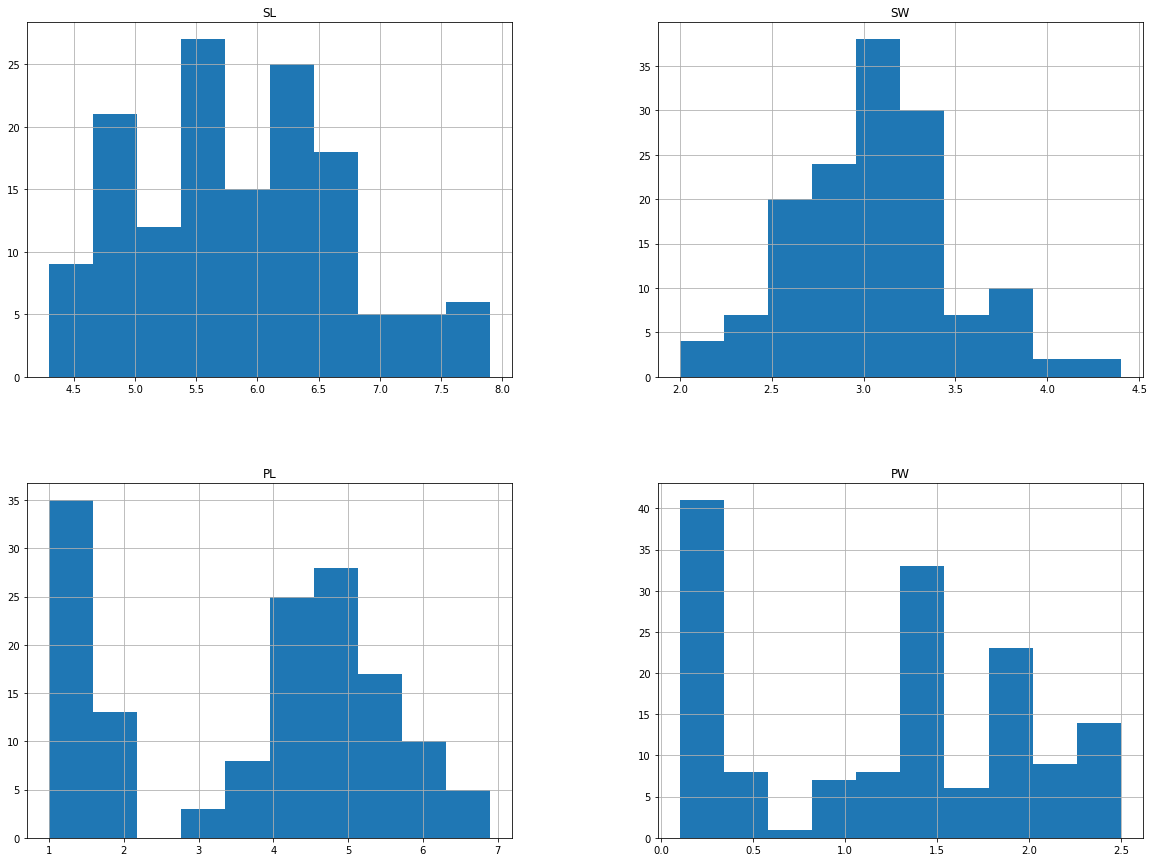

In [11]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [12]:
#since it is numerical value and the graphs are skewed we use median to fill the missing values
for i in ['SL','SW','PL','PW']:
    df[i]=df[i].fillna(df[i].median())

In [13]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### Exploratory Data Analysis 

In [14]:
#Scatterplot
colors=['red','green','blue']
Classification = ['Iris-setosa','Iris-versicolor','Iris-virginica']

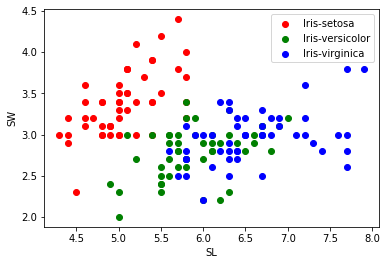

In [15]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SL'], x['SW'], c=colors[i], label=Classification[i])
plt.xlabel('SL')
plt.ylabel('SW')
plt.legend()
plt.show()
    

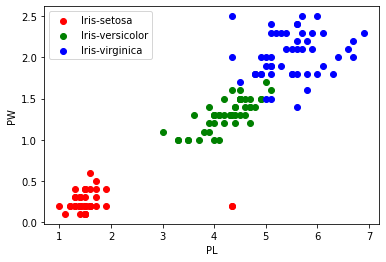

In [16]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['PL'], x['PW'], c=colors[i], label=Classification[i])
plt.xlabel('PL')
plt.ylabel('PW')
plt.legend()
plt.show()
    

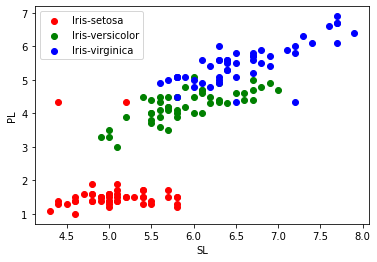

In [17]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SL'], x['PL'], c=colors[i], label=Classification[i])
plt.xlabel('SL')
plt.ylabel('PL')
plt.legend()
plt.show()
    

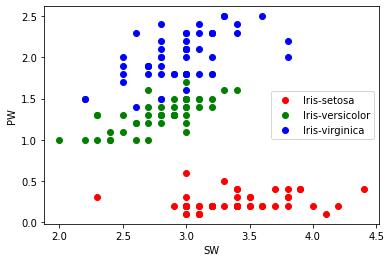

In [18]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SW'], x['PW'], c=colors[i], label=Classification[i])
plt.xlabel('SW')
plt.ylabel('PW')
plt.legend()
plt.show()
    

In [19]:
#Out of all the graphs we can consider petal length and width as the best attribute because we can easily seperate the classes

#### Correlation Matrix 

In [20]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.099107,0.830554,0.800939
SW,-0.099107,1.000000,-0.405531,-0.338655
PL,0.830554,-0.405531,1.000000,0.936089
PW,0.800939,-0.338655,0.936089,1.000000


<AxesSubplot:>

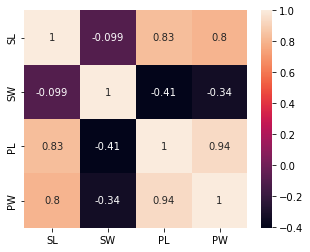

In [21]:
corrmatrix=df.corr()
plt.subplots(figsize=(5,4))
sns.heatmap(corrmatrix,annot=True)

#### Label Encoding 

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
df['Classification'] = le.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training  

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x = df.drop('Classification', axis=1)
y = df['Classification']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
                                                   random_state=42)

#### Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(x_train, y_train)
#model training 


C:\Users\FISAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
pred = lr.predict(x_test)
score = lr.score(x_test ,y_test)
print('Accuracy:', score*100)

Accuracy: 97.77777777777777


#### KNN 

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model =KNeighborsClassifier()

In [34]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
score = model.score(x_test ,y_test)
print('Accuracy:', score*100)

Accuracy: 95.55555555555556


#### Decision Tree 

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt_clf = DecisionTreeClassifier()

In [37]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
pred = dt_clf.predict(x_test)
score = dt_clf.score(x_test ,y_test)
print('Accuracy:', score*100)

Accuracy: 100.0


#### SVM 

In [39]:
from sklearn.svm import SVC

In [40]:
svm_clf =SVC(kernel ='rbf')

In [41]:
svm_clf.fit(x_train,y_train)

SVC()

In [42]:
pred = svm_clf.predict(x_test)
score =svm_clf.score(x_test ,y_test)
print('Accuracy:', score*100)

Accuracy: 97.77777777777777


#### Random Forest 

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_clf = RandomForestClassifier()

In [45]:
rf_clf.fit(x_train, y_train)


RandomForestClassifier()

In [46]:
pred =rf_clf.predict(x_test)
score =rf_clf.score(x_test,y_test)
print('Accuracy:', score*100)

Accuracy: 100.0


In [47]:
#Decision Tree and Random Forest Classifires has the Best accuracy of 100 %